In [1]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/bk/w3kf9k496lv9ntkhhfbltxs80000gn/T/pip-install-kdkfitr2/sklearn_a3d5fb4f5ee34fbd90e40f8fba7b189c/setup.py'"'"'; __file__='"'"'/private/var/folders/bk/w3kf9k496lv9ntkhhfbltxs80000gn/T/pip-install-kdkfitr2/sklearn_a3d5fb4f5ee34fbd90e40f8fba7b189c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/bk/w3kf9k496lv9ntkhhfbltxs80000gn/T/pip-pip-egg-info-2pd29rz4
         cwd: /private/var/folders/bk/w3kf9k496lv9ntkhhfbltxs80000gn/T/pip-install-kdkfitr2/sklea

In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.5 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 244 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 7.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 505 kB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 479 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 59.7 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 171 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 734 kB/s eta 0:00:01
     |████████████████████████████████| 5.7 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 536 kB 2.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, ParameterGrid
from sklearn.linear_model import LassoCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

import torch
import torch.nn as nn 
import torch.optim as optim


In [2]:
rain = pd.read_csv('weatherAUS.csv')

rain.head()



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
rain.dropna(subset = ['RainTomorrow'], inplace = True)

X = rain.loc[:, rain.columns != "RainTomorrow"]
y = rain[['RainTomorrow']]


missing_cols = rain.columns[rain.isnull().any()]
full_cols = rain.columns[rain.notna().all()] 
print(f'No Missing Values: \n{full_cols}\n')

categorical = rain.select_dtypes(exclude = 'number').columns
print(f'Categorical Columns (need encoding):\n{categorical}\n')

cat_cols = []
for col in categorical:
    if col not in full_cols:
        cat_cols.append(col)

quant_cols = []
for col in X:
    if col not in full_cols and col not in categorical:
        quant_cols.append(col)


No Missing Values: 
Index(['Date', 'Location', 'RainTomorrow'], dtype='object')

Categorical Columns (need encoding):
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')



In [4]:
X = X.copy()
X['Date'] = pd.to_datetime(X['Date'])

X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

X['Year_sin'] = np.sin(2 * np.pi * X['Year'] / 12)
X['Year_cos'] = np.cos(2 * np.pi * X['Year'] / 12)
X['Month_sin'] = np.sin(2 * np.pi * X['Month'] / 12)
X['Month_cos'] = np.cos(2 * np.pi * X['Month'] / 12)
X['Day_sin'] = np.sin(2 * np.pi * X['Day'] / 12)
X['Day_cos'] = np.cos(2 * np.pi * X['Day'] / 12)

X = X.drop(['Date', 'Year', 'Month', 'Day'], axis = 1)
print(f"New columns:\n{X.columns}\n")


New columns:
Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Year_sin', 'Year_cos', 'Month_sin',
       'Month_cos', 'Day_sin', 'Day_cos'],
      dtype='object')



In [5]:
print(f"Quantitative features with missing values: \n{quant_cols}\n")
print(f"Categorical features with missing values: \n{cat_cols}\n")

Quantitative features with missing values: 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Categorical features with missing values: 
['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']



In [6]:
for i, col in enumerate(quant_cols):
    X_notNA = X[col].dropna()
    mu_guess = X_notNA.mean()
    sigma_guess = X_notNA.std()
    c_guess = 0
    a_guess = 1
    X[col] = X[col].fillna(mu_guess)
    X_NA = X[X[col] == mu_guess]

In [7]:
for col in cat_cols:
    possible_observations = X[col].dropna().unique().tolist()
    X[col] = X[col].apply(lambda x: np.random.choice(possible_observations) if pd.isna(x) else x)


In [8]:
y = y.copy()
X = X.copy()
y['RainTomorrow10'] = y['RainTomorrow'].map({'Yes': 1, 'No': 0})
X['RainToday10'] = X['RainToday'].map({'Yes': 1, 'No': 0})

y = y.drop(['RainTomorrow'], axis = 1)
X = X.drop(['RainToday'], axis = 1)
y.rename(columns = {'RainTomorrow10': 'RainTomorrow'}, inplace = True)
X.rename(columns = {'RainToday10': 'RainToday'}, inplace = True)

cat_vars = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

label_encoder = LabelEncoder()

X['Encoded_Location'] = label_encoder.fit_transform(X['Location'])
X['Encoded_WindGustDir'] = label_encoder.fit_transform(X['WindGustDir'])
X['Encoded_WindDir9am'] = label_encoder.fit_transform(X['WindDir9am'])
X['Encoded_WindDir3pm'] = label_encoder.fit_transform(X['WindDir3pm'])

X = X.drop(['Location'], axis = 1)
X = X.drop(['WindGustDir'], axis = 1)
X = X.drop(['WindDir9am'], axis = 1)
X = X.drop(['WindDir3pm'], axis = 1)
X.rename(columns = {'Encoded_Location': 'Location'}, inplace = True)
X.rename(columns = {'Encoded_WindGustDir': 'WindGustDir'}, inplace = True)
X.rename(columns = {'Encoded_WindDir9am': 'WindDir9am'}, inplace = True)
X.rename(columns = {'Encoded_WindDir3pm': 'WindDir3pm'}, inplace = True)


In [9]:
X['Rain_Yesterday'] = X['Rainfall'].shift(1)
X['Avg_Rain_Last_Week'] = X['Rainfall'].rolling(window = 7).mean()
X['Max_Temp_Last_Month'] = X['MaxTemp'].rolling(window = 30).mean()
X['Min_Temp_Last_Month'] = X['MinTemp'].rolling(window = 30).mean()
X['temp_humidity_evap_9am'] = X['Temp9am'] * X['Humidity9am'] * X['Evaporation']
X['temp_humidity_evap_3pm'] = X['Temp3pm'] * X['Humidity3pm'] * X['Evaporation']
X['temp_humidity'] = X['Temp9am'] * X['Temp3pm'] * X['Humidity9am'] * X['Humidity3pm']

X['Rain_Yesterday'].fillna(-1, inplace = True)
X['Avg_Rain_Last_Week'].fillna(-1, inplace = True)
X['Max_Temp_Last_Month'].fillna(-1, inplace = True)
X['Min_Temp_Last_Month'].fillna(-1, inplace = True)

scaler = StandardScaler()
normed_X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(normed_X, y, test_size = 0.2, random_state = 42)



/var/folders/bk/w3kf9k496lv9ntkhhfbltxs80000gn/T/ipykernel_42526/2901877821.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Rain_Yesterday'].fillna(-1, inplace = True)
/var/folders/bk/w3kf9k496lv9ntkhhfbltxs80000gn/T/ipykernel_42526/2901877821.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Most Important Features: Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month_cos',
       'RainToday', 'WindDir9am', 'Max_Temp_Last_Month', 'Min_Temp_Last_Month',
       'temp_humidity_evap_9am', 'temp_humidity_evap_3pm'],
      dtype='object')
Coefficients: [0.01568863 0.01539177 0.09267463 0.21616548 0.10203823 0.02376727
 0.06018545 0.04319804 0.05238851 0.04863558]


<Figure size 1200x800 with 0 Axes>

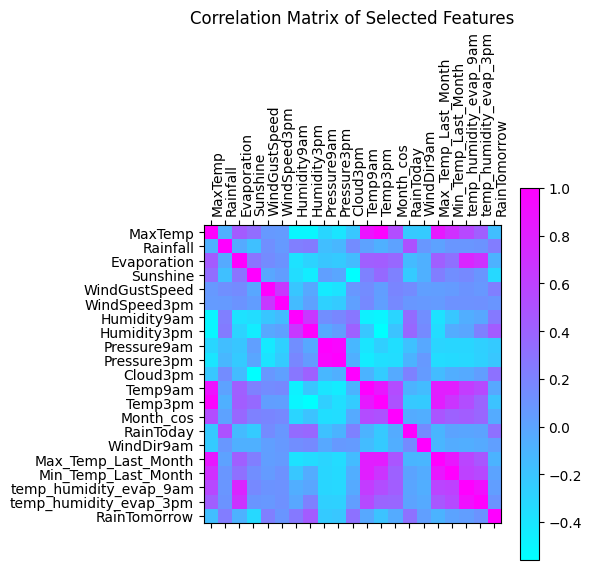

In [10]:
lasso = LassoCV(cv = 5)
lasso.fit(X_train, y_train.values.ravel())

important = X.columns[abs(lasso.coef_) >= 0.01]
print(f'Most Important Features: {important}')
print(f'Coefficients: {lasso.coef_[lasso.coef_ >= 0.01]}')

important = list(important)
important.append('RainTomorrow')
full = pd.concat([X, y], axis = 1)
correlation_matrix = full[important].corr()

plt.figure(figsize = (12, 8))
graph = plt.matshow(correlation_matrix, cmap = "cool")
plt.colorbar(graph)

plt.xticks(range(len(important)), important, rotation = 90, ha = 'left')
plt.yticks(range(len(important)), important)

plt.title("Correlation Matrix of Selected Features")
plt.show()


In [12]:
class MultiLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MultiLayerNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.tanh1 = nn.Tanh()

        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.tanh2 = nn.Tanh()

        self.layer3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.tanh1(self.layer1(x))
        x = self.tanh2(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x 


In [13]:
input_size = normed_X.shape[1]
hidden_size1 = 64
hidden_size2 = 32
output_size = 1
multi = MultiLayerNN(input_size, hidden_size1, hidden_size2, output_size)

In [14]:
criterion = nn.BCELoss()
optimizer = optim.Adam(multi.parameters(), lr = 0.001)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

num_epochs = 100
for epoch in range(num_epochs):
    outputs = multi(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

with torch.no_grad():
    multi.eval()
    predictions = multi(X_test_tensor)
    predictions_binary = (predictions >= 0.5).float()
    accuracy = torch.sum(predictions_binary == y_test_tensor).item() / len(y_test_tensor)
    print(f'Accuracy on the test set: {accuracy}')


Epoch [10/100], Loss: 0.591088056564331
Epoch [20/100], Loss: 0.5158956050872803
Epoch [30/100], Loss: 0.464267760515213
Epoch [40/100], Loss: 0.42413991689682007
Epoch [50/100], Loss: 0.3930298686027527
Epoch [60/100], Loss: 0.3752336800098419
Epoch [70/100], Loss: 0.36707377433776855
Epoch [80/100], Loss: 0.36442825198173523
Epoch [90/100], Loss: 0.3630746304988861
Epoch [100/100], Loss: 0.3617742359638214
Accuracy on the test set: 0.841063328527726


In [16]:
param_grid = {
    'hidden_size1': [32, 64, 128],
    'hidden_size2': [16, 32, 64],
    'learning_rate': [0.001, 0.01, 0.1],
}

param_combos = list(ParameterGrid(param_grid))

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

results = []
for params in param_combos:
    print(f"Testing Hyperparameters: {params}")
    model = MultiLayerNN(input_size, params['hidden_size1'], params['hidden_size2'], output_size)
    criterion = nn.BCELoss()
    
    optimizer = optim.Adam(model.parameters(), lr = params['learning_rate'])
    fold_accuracies = []

    for train_index, val_index in kf.split(normed_X):
        X_train_fold, X_val_fold = normed_X[train_index], normed_X[val_index]
        y_train_fold, y_val_fold = y.values[train_index], y.values[val_index]

        X_train_fold_tensor = torch.FloatTensor(X_train_fold)
        y_train_fold_tensor = torch.FloatTensor(y_train_fold).view(-1, 1)
        X_val_fold_tensor = torch.FloatTensor(X_val_fold)
        y_val_fold_tensor = torch.FloatTensor(y_val_fold).view(-1, 1)

        num_epochs = 50
        for epoch in range(num_epochs):
            outputs = model(X_train_fold_tensor)
            loss = criterion(outputs, y_train_fold_tensor)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            model.eval()
            predictions = model(X_val_fold_tensor)
            predictions_binary = (predictions >= 0.5).float()
            accuracy = torch.sum(predictions_binary == y_val_fold_tensor).item() / len(y_val_fold_tensor)
            fold_accuracies.append(accuracy)
    
    print(f'Accuracy: {accuracy}\n')

    avg_accuracy = np.mean(fold_accuracies)
    results.append({
        'params': params,
        'avg_accuracy': avg_accuracy
    })

best_result = max(results, key=lambda x: x['avg_accuracy'])
best_params = best_result['params']
print(f"Best Hyperparameters: {best_params}")

Testing Hyperparameters: {'hidden_size1': 32, 'hidden_size2': 16, 'learning_rate': 0.001}
Accuracy: 0.8438005485617835

Testing Hyperparameters: {'hidden_size1': 32, 'hidden_size2': 16, 'learning_rate': 0.01}
Accuracy: 0.8554047401364372

Testing Hyperparameters: {'hidden_size1': 32, 'hidden_size2': 16, 'learning_rate': 0.1}
Accuracy: 0.8548069484492581

Testing Hyperparameters: {'hidden_size1': 32, 'hidden_size2': 32, 'learning_rate': 0.001}
Accuracy: 0.8468949996483578

Testing Hyperparameters: {'hidden_size1': 32, 'hidden_size2': 32, 'learning_rate': 0.01}
Accuracy: 0.856424502426331

Testing Hyperparameters: {'hidden_size1': 32, 'hidden_size2': 32, 'learning_rate': 0.1}
Accuracy: 0.8533652155566496

Testing Hyperparameters: {'hidden_size1': 32, 'hidden_size2': 64, 'learning_rate': 0.001}
Accuracy: 0.847176313383501

Testing Hyperparameters: {'hidden_size1': 32, 'hidden_size2': 64, 'learning_rate': 0.01}
Accuracy: 0.8583585343554399

Testing Hyperparameters: {'hidden_size1': 32, 'hi

In [17]:
multi_optimal = MultiLayerNN(input_size, best_params['hidden_size1'], best_params['hidden_size2'], output_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(multi_optimal.parameters(), lr = best_params['learning_rate'])

num_epochs = 100
for epoch in range(num_epochs):
    outputs = model(X_test_tensor)
    loss = criterion(outputs, y_test_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

with torch.no_grad():
    multi.eval()
    predictions = multi(X_test_tensor)
    predictions_binary = (predictions >= 0.5).float()

    accuracy = torch.sum(predictions_binary == y_test_tensor).item() / len(y_test_tensor)
    print(f'Accuracy on the test set: {accuracy}')


Epoch [10/100], Loss: 0.3322826325893402
Epoch [20/100], Loss: 0.3322826325893402
Epoch [30/100], Loss: 0.3322826325893402
Epoch [40/100], Loss: 0.3322826325893402
Epoch [50/100], Loss: 0.3322826325893402
Epoch [60/100], Loss: 0.3322826325893402
Epoch [70/100], Loss: 0.3322826325893402
Epoch [80/100], Loss: 0.3322826325893402
Epoch [90/100], Loss: 0.3322826325893402
Epoch [100/100], Loss: 0.3322826325893402
Accuracy on the test set: 0.841063328527726


In [18]:
acc = torch.sum(predictions_binary == y_test_tensor).item() / len(y_test_tensor)

prec = precision_score(y_test_tensor.numpy(), predictions_binary.numpy())

recall = recall_score(y_test, predictions_binary)

f1 = f1_score(y_test, predictions_binary)

print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}\n')

conf_matrix = confusion_matrix(y_test, predictions_binary)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.841063328527726
Precision: 0.699627274720456
Recall: 0.503232928560164
F1 Score: 0.5853971748303064

Confusion Matrix:
[[20728  1370]
 [ 3150  3191]]
